# Cajamar predictive modelling

Load the basic libraries

In [94]:
import numpy as np
import pandas as pd

## Load data

The decimal separator has been already changed from a comma to a dot.

We load the training and the test data.

In [2]:
data = pd.read_csv("Predictive Modelling Train_dot.txt", sep="|", index_col="ID")

In [3]:
len(data.columns)

98

In [4]:
data.columns

Index([u'SOCIO_DEMO_01', u'IND_PROD_01', u'IND_PROD_02', u'IND_PROD_03',
       u'IND_TEND_09', u'IND_PROD_04', u'IND_TEND_02', u'IND_PROD_05',
       u'IND_PROD_06', u'IND_TEND_08', u'IND_PROD_07', u'IND_TEND_07',
       u'IND_PROD_08', u'IND_TEND_01', u'IND_TEND_04', u'IND_TEND_06',
       u'IND_TEND_03', u'IND_TEND_05', u'SOCIO_DEMO_02', u'IND_PROD_09',
       u'IND_PROD_10', u'IND_PROD_11', u'IND_PROD_12', u'IND_PROD_13',
       u'IND_PROD_14', u'IND_PROD_15', u'IND_PROD_16', u'IND_PROD_17',
       u'IND_PROD_18', u'IND_PROD_19', u'IND_PROD_20', u'IND_PROD_21',
       u'IND_PROD_22', u'IND_PROD_23', u'TARGET', u'IMP_SAL_01', u'IMP_SAL_02',
       u'IMP_SAL_03', u'NUM_OPER_05', u'IMP_SAL_16', u'NUM_OPER_06',
       u'NUM_OPER_07', u'IMP_SAL_17', u'NUM_OPER_08', u'IMP_SAL_18',
       u'NUM_OPER_09', u'IMP_SAL_19', u'NUM_OPER_10', u'IMP_SAL_04',
       u'NUM_OPER_11', u'IMP_SAL_15', u'NUM_OPER_12', u'IMP_SAL_20',
       u'IMP_SAL_05', u'IMP_SAL_06', u'IMP_SAL_07', u'IMP_SAL_08',
     

In [5]:
data_test = pd.read_csv("Predictive Modelling Test_dot.txt", sep="|", index_col="ID")

In [6]:
data_test.columns

Index([u'SOCIO_DEMO_01', u'IND_PROD_01', u'IND_PROD_02', u'IND_PROD_03',
       u'IND_TEND_09', u'IND_PROD_04', u'IND_TEND_02', u'IND_PROD_05',
       u'IND_PROD_06', u'IND_TEND_08', u'IND_PROD_07', u'IND_TEND_07',
       u'IND_PROD_08', u'IND_TEND_01', u'IND_TEND_04', u'IND_TEND_06',
       u'IND_TEND_03', u'IND_TEND_05', u'SOCIO_DEMO_02', u'IND_PROD_09',
       u'IND_PROD_10', u'IND_PROD_11', u'IND_PROD_12', u'IND_PROD_13',
       u'IND_PROD_14', u'IND_PROD_15', u'IND_PROD_16', u'IND_PROD_17',
       u'IND_PROD_18', u'IND_PROD_19', u'IND_PROD_20', u'IND_PROD_21',
       u'IND_PROD_22', u'IND_PROD_23', u'IMP_SAL_01', u'IMP_SAL_02',
       u'IMP_SAL_03', u'NUM_OPER_05', u'IMP_SAL_16', u'NUM_OPER_06',
       u'NUM_OPER_07', u'IMP_SAL_17', u'NUM_OPER_08', u'IMP_SAL_18',
       u'NUM_OPER_09', u'IMP_SAL_19', u'NUM_OPER_10', u'IMP_SAL_04',
       u'NUM_OPER_11', u'IMP_SAL_15', u'NUM_OPER_12', u'IMP_SAL_20',
       u'IMP_SAL_05', u'IMP_SAL_06', u'IMP_SAL_07', u'IMP_SAL_08',
       u'NUM_OPE

The classification data is separated in the training dataset. It is saved in the extra column with a different name called "TARGET".

In [7]:
target = data["TARGET"]
del data["TARGET"]

## Split test dataset

The original training dataset is partitioned in a training part with 75% of the data and a testing part with 25% of the data. The split is done randomly to avoid problems with the posible underlying ordering of the features.

In [8]:
from sklearn.cross_validation import train_test_split

/home/jsm/programs/soft/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.astype(np.float64).values,
    target.astype(np.float64).values, train_size=0.75, test_size=0.25)

## Automatic pipeline selection using TPOT

We will use TPOT to find the optimal classifier and its parameters.

In [10]:
from tpot import TPOTClassifier

In [11]:
pipeline_optimizer = TPOTClassifier(generations=1, population_size=20, num_cv_folds=5, random_state=42, verbosity=2)

In [12]:
pipeline_optimizer.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.69873317346

Best pipeline: BernoulliNB(input_matrix, 0.10000000000000001, 0.46000000000000002)


In [13]:
pipeline_optimizer.export("pipeline2_1gen.py")

## Bernoulli NB Classifier

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline

In [15]:
nb_pipeline = make_pipeline(
    BernoulliNB(alpha=0.1, binarize=0.46, fit_prior=True)
)

In [16]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bernoullinb', BernoulliNB(alpha=0.1, binarize=0.46, class_prior=None, fit_prior=True))])

In [17]:
nb_pipeline.score(data.astype(np.float64).values, target.astype(np.float64).values)

0.7830590160182096

In [18]:
result_nb = nb_pipeline.predict(data.astype(np.float64).values)

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [75]:
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(target.astype(np.float64).values, result_nb)
auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [48]:
print "False positive rate: {:6.4f}".format(fpr_nb[1])
print "True positive rate: {:6.4f}".format(tpr_nb[1])
print "Area under the curve: {:6.4f}".format(auc_nb)

False positive rate: 0.2142
True positive rate: 0.6115
Area under the curve: 0.6987


In [50]:
lw = 2
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=lw, label="AUC: {:6.4f}".format(auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic BernoulliNB Classifier')
plt.legend(loc="lower right")

## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gb_pipeline = make_pipeline(
    GradientBoostingClassifier(learning_rate=0.83, max_features=0.83, n_estimators=500)
)

In [56]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.83, loss='deviance', max_depth=3,
              max_features=0.83, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])

In [57]:
gb_pipeline.score(data.astype(np.float64).values, target.astype(np.float64).values)

0.9852746069625592

In [58]:
result_gb = gb_pipeline.predict(data.astype(np.float64).values)

Check the number of missclassifications

In [59]:
np.sum(np.abs(target.astype(np.float64).values-result_gb)) # Number of errors

6948.0

In [62]:
fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(target.astype(np.float64).values, result_gb)
auc_gb = metrics.auc(fpr_gb, tpr_gb)

In [63]:
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=lw, label="AUC: {:6.4f}".format(auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Gradient Boosting Classifier')
plt.legend(loc="lower right")

## Random forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=500)
)

In [66]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [67]:
rf_pipeline.score(data.astype(np.float64).values, target.astype(np.float64).values)

0.9960452528198237

In [68]:
result_rf = rf_pipeline.predict(data.astype(np.float64).values)

Number of missclassifications

In [69]:
np.sum(np.abs(target.astype(np.float64).values-result_rf)) 

1866.0

In [70]:
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(target.astype(np.float64).values, result_rf)
auc_rf = metrics.auc(fpr_rf, tpr_rf)

In [71]:
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label="AUC: {:6.4f}".format(auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Random Forest Classifier')
plt.legend(loc="lower right")

## Comparison between classifiers

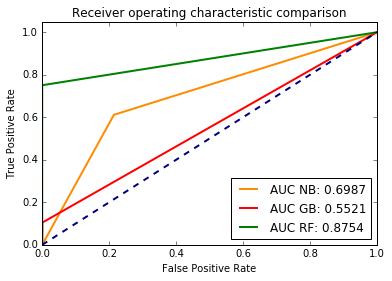

In [88]:
lw = 2
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=lw, label="AUC NB: {:6.4f}".format(auc_nb))
plt.plot(fpr_gb, tpr_gb, color='red', lw=lw, label="AUC GB: {:6.4f}".format(auc_gb))
plt.plot(fpr_rf, tpr_rf, color='green', lw=lw, label="AUC RF: {:6.4f}".format(auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic comparison')
plt.legend(loc="lower right")

plt.savefig("roc.png", dpi=300)
plt.savefig("roc.svg")

## Check ordering problem and predict

We check if the positive results are clustered at the end of the test array.

In [77]:
def per_results(result):
    return np.sum(result)/len(result)

In [78]:
result_test_rf = rf_pipeline.predict(data_test.astype(np.float64).values)

In [80]:
per_results(result_test_rf)

0.0010270742703081717

In [81]:
result_test_rf.shape

(202517,)

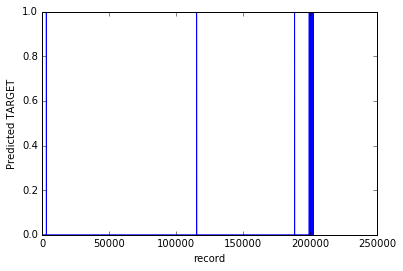

In [87]:
plt.plot(result_test_rf)
plt.xlabel("record")
plt.ylabel("Predicted TARGET")
plt.savefig("predict.png", dpi=300)
plt.savefig("predict.svg")

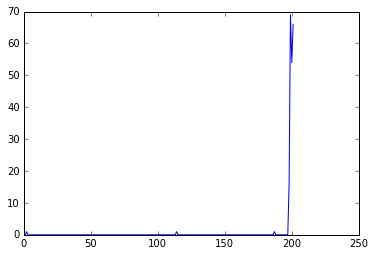

In [79]:
plt.plot(result_test_rf[517:202517].reshape((202,1000)).sum(axis=1))

The data with positive values is clustered around the end of the array confirming the possible problem with the randomization of the data.

In [101]:
result_test_nb = nb_pipeline.predict(data_test.astype(np.float64).values)

In [102]:
len(result_test_nb)

202517

In [103]:
np.sum(result_test_nb)

44437.0

In [104]:
per_results(result_test_nb)

0.21942355456578955

In [105]:
t = target.astype(np.float64).values
np.sum(t)/len(t)

0.015848659921413707

In [107]:
result_test_gb = gb_pipeline.predict(data_test.astype(np.float64).values)

In [108]:
np.sum(np.abs(result_test_gb-result_test_rf)) 

295.0

In [109]:
len(result_test_gb)

202517

In [110]:
np.sum(result_test_gb)

469.0

In [111]:
per_results(result_test_gb)

0.0023158549652621753

## Automatic final classification

In [112]:
gb_pipeline2 = make_pipeline(
    GradientBoostingClassifier(learning_rate=0.83, max_features=0.83, n_estimators=500)
)

In [113]:
data['ID'] = data.index

In [114]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.astype(np.float64).values,
    target.astype(np.float64).values, train_size=0.75, test_size=0.25)

In [118]:
gb_pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.83, loss='deviance', max_depth=3,
              max_features=0.83, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])

In [119]:
gb_pipeline2.score(data.astype(np.float64).values, target.astype(np.float64).values)

1.0

In [120]:
result_gb2 = gb_pipeline2.predict(data.astype(np.float64).values)

In [121]:
fpr_gb2, tpr_gb2, thresholds_gb2 = metrics.roc_curve(target.astype(np.float64).values, result_gb2)
auc_gb2 = metrics.auc(fpr_gb2, tpr_gb2)

In [122]:
print "False positive rate: {:6.4f}".format(fpr_gb2[1])
print "True positive rate: {:6.4f}".format(tpr_gb2[1])
print "Area under the curve: {:6.4f}".format(auc_gb2)

False positive rate: 1.0000
True positive rate: 1.0000
Area under the curve: 1.0000


In [146]:
plt.plot(fpr_gb2, tpr_gb2, color='darkorange', lw=lw, label="AUC: {:6.4f}".format(auc_gb2))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Gradient Boosting Classifier')
plt.legend(loc="lower right")

plt.savefig("final_roc.png", dpi=300)
plt.savefig("final_roc.svg")

In [125]:
data_test['ID'] = data_test.index

Prediction for the test sample

In [126]:
result_test_gb2 = gb_pipeline2.predict(data_test.astype(np.float64).values)

## Manual final classification

In [140]:
result_test_ex = np.zeros(len(result_test_rf))

In [141]:
#change_index = int(round(len(result_test_rf)*(1.-np.sum(t)/len(t))))
change_index = 199352 

In [142]:
result_test_ex[change_index:] = 1

In [143]:
np.sum(np.abs(result_test_rf-result_test_ex))

2963.0

In [144]:
np.sum(np.abs(result_test_gb2-result_test_ex))

1.0

## Export the results

In [91]:
import json
import codecs

In [154]:
def export_json(dataset, filename, save_numpy=True, save_respuesta=True):
    json.dump(dataset.astype(int).tolist(), 
          codecs.open(filename+".json", 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)
    if save_numpy:
        np.save(filename+".npy", dataset.astype(int))
    if save_respuesta:
        data_test["Respuesta"] = dataset.astype(int)
        data_test[["Respuesta"]].to_csv(filename+".txt", sep="|")

In [155]:
export_json(result_test_nb, "result_nb")

In [156]:
export_json(result_test_gb, "result_gb")

In [157]:
export_json(result_test_rf, "result_rf")

In [158]:
export_json(result_test_ex, "result_ex")

In [159]:
export_json(result_test_gb2, "result_final")

In [ ]:
#result = np.array(json.loads(codecs.open(file_path, 'r', encoding='utf-8').read()))

We also export the final data in the required format

In [152]:
data_test["Respuesta"] = result_test_gb2.astype(int)
#data_test["Id"] = data_test["ID"]

In [153]:
data_test[["Respuesta"]].to_csv("respuesta.txt", sep="|")